
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.76      0.92      0.83        63
           2       0.91      0.88      0.89        24
           3       0.88      0.92      0.90       132
           4       0.74      0.85      0.79        20
           5       1.00      0.64      0.78        22
           6       0.90      0.85      0.88        33

    accuracy                           0.86       322
   macro avg       0.89      0.81      0.84       322
weighted avg       0.87      0.86      0.86       322



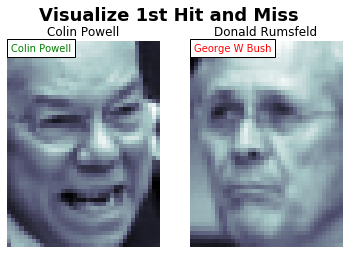

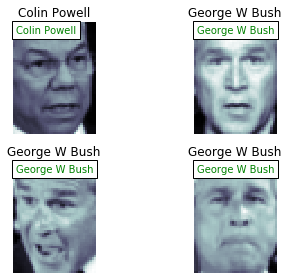

In [2]:
import numpy as np
from random import randint
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def find_misses(test, pred):
    return [i for i, row in enumerate(test) if row != pred[i]]

def find_hit(n, ls):
    return True if n in ls else False

def build_fig(indx, pos, color, one, two):
    X_i = np.array(X_test[indx]).reshape(50, 37)
    t = targets[y_test[indx]]
    p = targets[y_pred[indx]]
    ax = fig.add_subplot(pos)
    image = ax.imshow(X_i,  cmap='bone')
    ax.set_axis_off()
    ax.set_title(t)
    ax.text(one, two, p, color=color,
            bbox=dict(facecolor='white'))

def chk_acc(rnds):
    logic = [1 if y_test[row] == y_pred[row] else 0
             for row in rnds]
    colors = ['g' if row == 1 else 'r' for row in logic]
    return colors

if __name__ == "__main__":
    br = '\n'
    X = np.load('data/X_faces.npy')
    y = np.load('data/y_faces.npy')
    # need allow_pickle=True parameter
    bp = np.load('data/bp_face.npy', allow_pickle=True)
    bp = bp.tolist()
    images = np.load('data/faces_images.npy')
    targets = np.load('data/faces_targets.npy')
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
    pca = PCA(n_components=0.95, whiten=True, random_state=0)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    svm = SVC(**bp)
    svm.fit(X_train_pca, y_train)
    y_pred = svm.predict(X_test_pca)
    print ()
    cr = classification_report(y_test, y_pred)
    print (cr)
    misses = find_misses(y_test, y_pred)
    miss = misses[0]
    hit = 1
    X_hit = np.array(X_test[hit]).reshape(50, 37)
    y_test_hit = targets[y_test[hit]]
    y_pred_hit = targets[y_pred[hit]]
    X_miss = np.array(X_test[miss]).reshape(50, 37)
    y_test_miss = targets[y_test[miss]]
    y_pred_miss = targets[y_pred[miss]]
    fig = plt.figure('1st Hit and Miss')
    fig.suptitle('Visualize 1st Hit and Miss',
                 fontsize=18, fontweight='bold')
    build_fig(hit, 121, 'g', 0.4, 1.9)
    build_fig(miss, 122, 'r', 0.4, 1.9)
    rnd_ints = [randint(0, y_test.shape[0]-1)
                for row in range(4)]
    colors = chk_acc(rnd_ints)
    fig = plt.figure('Four Random Predictions')
    build_fig(rnd_ints[0], 221, colors[0], .9, 4.45)
    build_fig(rnd_ints[1], 222, colors[1], .9, 4.45)
    build_fig(rnd_ints[2], 223, colors[2], .9, 4.45)
    build_fig(rnd_ints[3], 224, colors[3], .9, 4.45)
    plt.tight_layout()
    plt.show()